## Problem statement
Groom customers based on their spending patter and purchasing behaviours.

There is a mall which sends insight to me about its customers.
I need to cluster customers according to their purchasing behaviours to improve marketing startegies. 

## Workflow
 - Getting the customer data
 - Data preprocessing the data
 - Data Analysis
 - Choose the correct number of custer (Within Cluster Sum of Squares) to get the optimum number of clusters 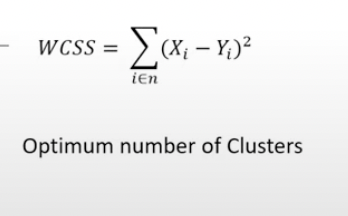
 - Feed the data into K-means clustering

Importing the dependencies

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data Collection and analysis

In [22]:
#loading the data from the csv file to a pandas datafarame
customer_data=pd.read_csv("Mall_Customers.csv")

In [23]:
#first 5 rows
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [24]:
#Number of rows and columns
customer_data.shape

(200, 5)

In [25]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [26]:
#checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

If we have some missing values we use methods of imputation to convert them into some values or we directly remove the whole row

In [27]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


For this we don't need Customer ID, age and gender. So we only have to take the annual income and spending score.

In [33]:
x = customer_data.iloc[:,[3,4]].values

Choosing the number of clusters required by WCSS(Within Cluster Sum of Squares). tends to find the distance between the point and their centroid. WCSS should be very less means disteance close to centroid to be chosen

In [35]:
#finding WCSS values for different number of clusters

wcss= []
for i in range(1,11): #it will be checked with different clusters formed from having 1 cluster to 10 clusters
    kmeans= KMeans(n_clusters=i, init='k-means++', random_state=42)#data will be split according to the random_state
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

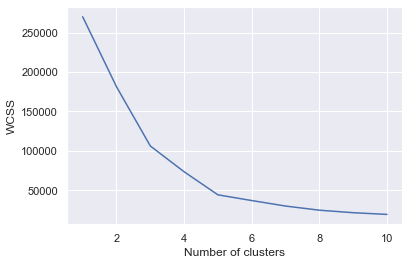

In [36]:
#plotting the elbow graph to check the minimum wcss value
sns.set()
plt.plot(range(1,11),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Here in the elbow graph we have to take the largest declination in the graph from y axis. For the above case it is when number of clusters is 5. So the optimum number of graphs will be 5.

Training from kmeans clustering algorithm

In [37]:
kmeans=KMeans(n_clusters=5, init='k-means++', random_state=42)

In [38]:
#returning a lable for each data point based on their cluster. Means each cluster will be given a label so each data point will also get that respective label
y=kmeans.fit_predict(x)
print(y)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


## Visualising all the clusters

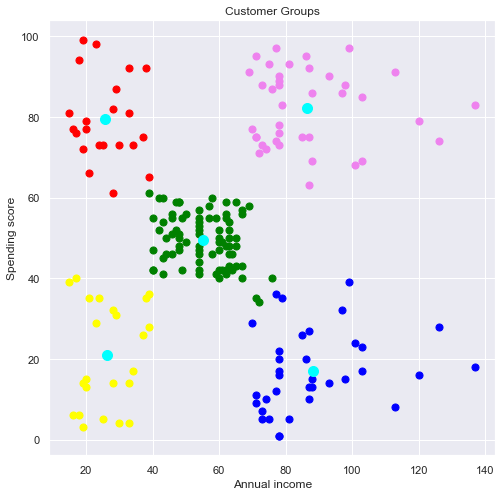

In [44]:
# Plotting all the clusters and their centroids

plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0], x[y==0,1],s=50, c="green", label="Cluster 1")
plt.scatter(x[y==1,0], x[y==1,1],s=50, c="blue", label="Cluster 2")
plt.scatter(x[y==2,0], x[y==2,1],s=50, c="yellow", label="Cluster 3")
plt.scatter(x[y==3,0], x[y==3,1],s=50, c="red", label="Cluster 4")
plt.scatter(x[y==4,0], x[y==4,1],s=50, c="violet", label="Cluster 5")

#plotting the centroid
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c="cyan", label="Centroids")
plt.title("Customer Groups")
plt.xlabel("Annual income")
plt.ylabel("Spending score")
plt.show()


## Conclusion
- The red color people have less annual income but more expenditure
- The yellow color people have less spending and less income
- The blue color people have more annual income but less expenditure
- The violet color people have More spending and more annual income which makes them the best customers
- The green color people have both average.